In [1]:
cd ..

/home/mars/mount/src_aiai


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
grads = ["", "grad_"]
ISNRs = [30, 20]
activations = ["linear", "sigmoid"]


In [4]:
losses = {}
epochs = {}
for ISNR in [30]:
    for grad in grads:
        for activation in activations:
            key = grad + activation
            path = f"./logs/COCO/log_medium_{ISNR}dB_{activation}_{grad}new_1"
            loss = pd.read_csv(path)
            epochs[key] = loss.epoch.values
            losses[key] = loss.loss.values

In [5]:
loss.head()

,epoch,loss
0,0,0.038155
1,1,0.027139
2,2,0.021526
3,3,0.019761
4,4,0.018420


linear 2
sigmoid 1
grad_linear 2
grad_sigmoid 1


Text(0.5, 0, 'iterations')

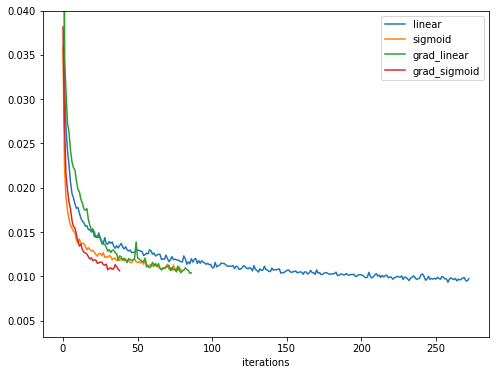

In [6]:
plt.figure(figsize=(8,6))
for i in losses:
    n = np.sum(epochs[i] ==0)
    print(i, np.sum(epochs[i] ==0))
    plt.plot( losses[i], label = i)
plt.legend()
plt.axis(ymax=.04)
plt.xlabel('iterations')

Text(0, 0.5, 'loss')

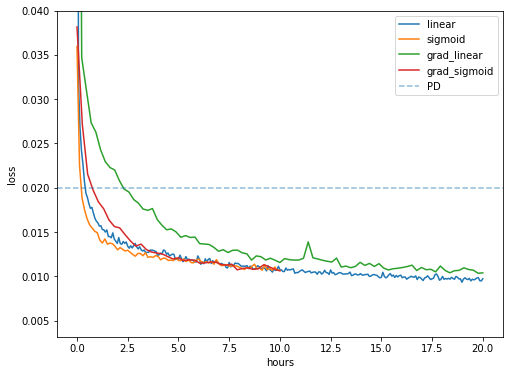

In [7]:
plt.figure(figsize=(8,6))
for i in losses:
    n = np.sum(epochs[i] ==0)
    plt.plot(np.linspace(0,10*n, len(losses[i])), losses[i], label = i)
plt.axhline(0.020, ls="dashed", alpha=.5, label="PD")
plt.legend()
plt.axis(ymax=.04)
plt.xlabel('hours')
plt.ylabel('loss')

In [8]:
losses2 = {}
epochs2 = {}
for ISNR in [20]:
    for grad in grads:
        for activation in ["linear"]:
            key = grad + activation
            path = f"./logs/COCO/log_medium_{ISNR}dB_{activation}_{grad}new_1"
            loss = pd.read_csv(path)
            epochs2[key] = loss.epoch.values
            losses2[key] = loss.loss.values

Text(0, 0.5, 'loss')

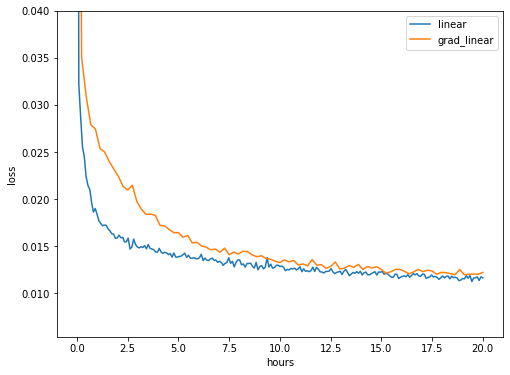

In [9]:
plt.figure(figsize=(8,6))
for i in losses2:
    n = np.sum(epochs[i] ==0)
    plt.plot(np.linspace(0,10*n, len(losses2[i])), losses2[i], label = i)
plt.legend()
plt.axis(ymax=.04)
plt.xlabel('hours')
plt.ylabel('loss')

# 2

In [10]:

losses = {}
epochs = {}
times = {}

adjoint = [
    "log_adjoint_30dB_sigmoid",
    "log_adjoint_30dB_sigmoid_learned_adjoint",
]

unet = [
    "log_unet_30dB_sigmoid",
    "log_unet_30dB_sigmoid_learned_adjoint",
]

dunet = [
    "log_dunet_30dB_sigmoid",
    "log_dunet_30dB_sigmoid_learned_adjoint", 
    "log_dunet_30dB_sigmoid_learned_grad",   
    "log_dunet_30dB_sigmoid_upsample_grad",   
]

all_ = adjoint + unet + dunet

for key in all_:
    path = f"./logs/COCO/{key}"
    loss = pd.read_csv(path)
    epochs[key] = np.arange(len(loss)) + 1 #loss.epoch.values
    losses[key] = loss.loss.values
    times[key] = loss.time.values            

Text(0, 0.5, 'epochs')

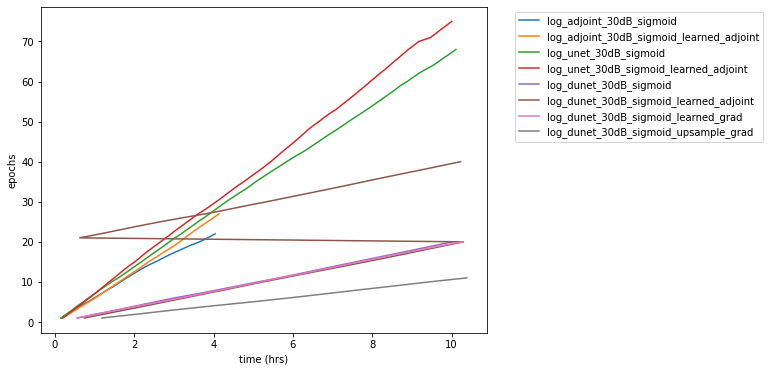

In [11]:
plt.figure(figsize=(8,6))
for key in epochs:
    plt.plot(times[key]/60/60, epochs[key], label=key)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('time (hrs)')
plt.ylabel("epochs")

log_unet_30dB_sigmoid:                             1.074e-02 (537s)
log_unet_30dB_sigmoid_learned_adjoint:             1.503e-02 (477s)
log_dunet_30dB_sigmoid:                            1.304e-02 (1798s)
log_dunet_30dB_sigmoid_learned_adjoint:            1.125e-02 (767s)
log_dunet_30dB_sigmoid_learned_grad:               1.158e-02 (1832s)
log_dunet_30dB_sigmoid_upsample_grad:              1.368e-02 (3257s)


Text(0, 0.5, 'loss')

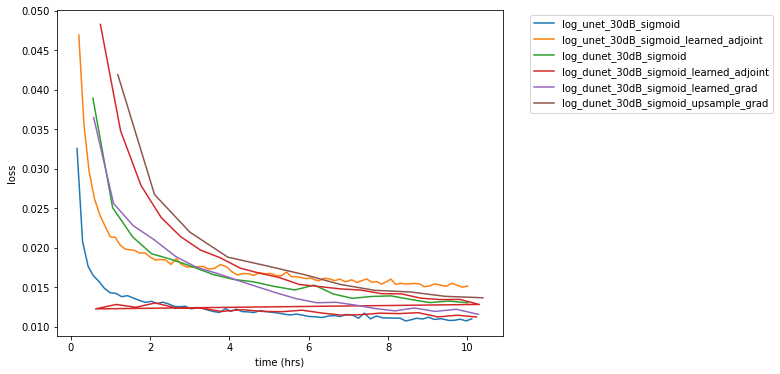

In [12]:
plt.figure(figsize=(8,6))
for key in epochs:
    if not "log_adjoint" in key:
        dt = np.mean(times[key][5:] - times[key][4:-1])
        print(f"{key + ':' :<50} {min(losses[key]):.3e} ({dt:.0f}s)")
        plt.plot(times[key]/60/60, losses[key], label=key)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('time (hrs)')
plt.ylabel("loss")

In [13]:
3257 - 2897

360

log_unet_30dB_sigmoid:                             1.074e-02 ( 177s/2000) (0.088s/sample)
log_unet_30dB_sigmoid_learned_adjoint:             1.503e-02 ( 117s/2000) (0.058s/sample)
log_dunet_30dB_sigmoid:                            1.304e-02 (1438s/2000) (0.719s/sample)
log_dunet_30dB_sigmoid_learned_adjoint:            1.125e-02 ( 407s/2000) (0.204s/sample)
log_dunet_30dB_sigmoid_learned_grad:               1.158e-02 (1472s/2000) (0.736s/sample)
log_dunet_30dB_sigmoid_upsample_grad:              1.368e-02 (2897s/2000) (1.448s/sample)


Text(0, 0.5, 'loss')

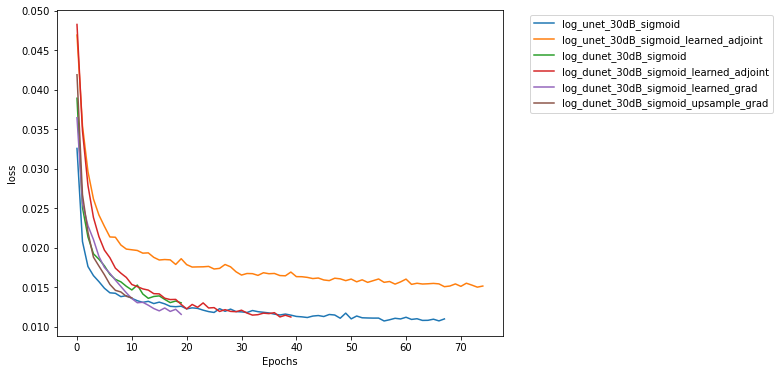

In [14]:
plt.figure(figsize=(8,6))
for key in epochs:
    if not "log_adjoint" in key:
        dt = np.mean(times[key][5:] - times[key][4:-1] - 360)
        print(f"{key + ':' :<50} {min(losses[key]):.3e} ({dt:>4.0f}s/2000) ({dt/2000:>.3f}s/sample)")
        plt.plot(losses[key], label=key)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Epochs')
plt.ylabel("loss")